In [1]:
import os

#Move the directory back to Duke_Data
#Check if the current directory is Duke_Data
if os.getcwd().split('/')[-1] != 'DUKE_ANALOG_ZNE_DATA':
    #os.chdir('Duke_Data')
    os.chdir('../')
    #print(os.getcwd().split('/')[-1])
    #pass
else:
    pass

import sys
sys.path.insert(0, './scripts')
sys.path.insert(1, './')
#sys.path.insert(2, './util')


from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve, sesolve, mesolve)
from qutip.expect import expect
import numpy as np
from util.samplers_util import thermal_rejection
import matplotlib.pyplot as plt
from util.basic_TFIM_funcs import get_s_lists
from joblib import Parallel, delayed


print(os.getcwd())
from util.index import print_index, get_experiment, index_folder
from util.functions_util import cetina_thermal_exp, cetina_envelope_exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import numpy as np
import h5py
from util.fitting_functions_ZNE import linear_ZNE, third_no_first_ZNE



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/Users/thomassteckmann/Duke_Analog_ZNE_data


In [2]:
print(os.getcwd())

/Users/thomassteckmann/Duke_Analog_ZNE_data


In [3]:
# #Simulating the Jij XX oscillations with active heating + maybe dephasing noise
# """How to deal with active heating of the chain?
# Option 1: increase the random theta linearly in time. Probably the best bet. 
# Option 2: rescample ever few time steps with a higher temperature.

# I think option 1 is the best for now
# """
# #Need to set Jij ~1000*2*pi, so Omega = np.sqrt(1000). This way the time scale is ms for a full Jij oscillation
# #Realistic:
# #theta_0  = 0.060577043438396795
# #theta_dot = 0.0502438865537055 * 1e3
# #print(theta_0)
# #print(theta_dot)
# #Not realistic:
# theta_0  = 0.055577043438396795
# #theta_0 = 0
# theta_dot = 0.02172438865537055 * 1e3
# #theta_0 = 0
# #theta_dot = 0
# sx, sy, sz = get_s_lists(2)

# t_list = np.linspace(0, 4, 200) * 1e-3
# Omega = np.sqrt(460*2*np.pi)
# Omega = np.sqrt(265*2*np.pi)
# J = Omega**2


# integration_times = np.linspace(0,10, 500)



# #Jij Experiment:
# theta_0  = 0.08
# psi0 = tensor(basis(2,0), basis(2,1))
# obs = [0.5*(sz[0] - sz[1])]
# xrate = np.sqrt(0.00)
# zrate = np.sqrt(0.0)



# #Bz increasing:
# # theta_0  = 0.055577043438396795
# # psi0 = tensor(basis(2,0), basis(2,0))
# # obs = [0.5*(sz[0] + sz[1])]
# # xrate = np.sqrt(0.001)
# # zrate = np.sqrt(0.0)

# #dephasing:
# #print(np.sqrt(rate)/J)

# noisy_ops = [sx[i]*np.sqrt(xrate) for i in range(2)]
# Sz_noise = (sz[0] * sz[1])*zrate
# #noisy_ops = []
# noisy_ops.append(Sz_noise)


# #HXX = HXX* Omega**2

# def genH(theta_0, J, B):
#     delta = thermal_rejection(theta_0,1)[0]
#     factor = (1 - delta)**2

#     HXX = J*factor*(sx[0]*sx[1]) 
#     #print(HXX)
#     HB = B*(sz[0] + sz[1])
#     #print(HB)

#     return [HXX + HB]


# #psi0 = tensor(basis(2,0), basis(2,0))
# #plus = (basis(2,0) + basis(2,1)).unit()
# #yplus = (basis(2,0) + 1j*basis(2,1)).unit()
# #minus = 
# #psi0 = tensor(yplus, yplus)

# #import Options from qutip:
# from qutip.solver import Options
# #increase nsteps
# options = Options(nsteps=1e3)

# def run(theta_0, J,B):
#     H = genH(theta_0,J,B)
#     results = mesolve(H, psi0,integration_times, noisy_ops, obs, options=options)#, ntraj=1)
#     return results
# shots = 100



# #full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, theta_dot,Omega) for i in range(shots))
    

# def gen_full_results(theta_0, J,B):
#     #H = genH(theta_0, theta_dot)
#     full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, J,B) for _ in range(shots))
#     averaged = np.zeros(len(integration_times))
#     for item in full_results:
#         #print(item.expect[0])
#         averaged += item.expect[0]
#     averaged = averaged/shots
#     return averaged#[indices]


In [51]:
from qutip import (about, basis, expect, mesolve, qeye, sigmax, sigmay, sigmaz, tensor, mcsolve, sesolve, mesolve)
from util.basic_TFIM_funcs import get_s_lists
from joblib import Parallel, delayed
from util.samplers_util import thermal_rejection



#Simulating the Jij XX oscillations with active heating + maybe dephasing noise
"""How to deal with active heating of the chain?
Option 1: increase the random theta linearly in time. Probably the best bet. 
Option 2: rescample ever few time steps with a higher temperature.

I think option 1 is the best for now
"""
#Need to set Jij ~1000*2*pi, so Omega = np.sqrt(1000). This way the time scale is ms for a full Jij oscillation
#Realistic:
#theta_0  = 0.060577043438396795
#theta_dot = 0.0502438865537055 * 1e3
#print(theta_0)
#print(theta_dot)
#Not realistic:
theta_0  = 0.055577043438396795
#theta_0 = 0
theta_dot = 0.02172438865537055 * 1e3
#theta_0 = 0
#theta_dot = 0
sx, sy, sz = get_s_lists(2)

t_list = np.linspace(0, 15, 200)# * 1e-3

psi0 = tensor(basis(2,0), basis(2,1))
#psi0 = tensor(basis(2,0), basis(2,1))
#obs = [0.5*(sz[0] - sz[1])]
#obs = [sx[0]]#*sx[1]*sx[2]*sx[3]]
#xrate = np.sqrt(0.0)*J
#zrate = np.sqrt(0.0)*J



#Bz increasing:
# theta_0  = 0.055577043438396795
# psi0 = tensor(basis(2,0), basis(2,0))
# obs = [0.5*(sz[0] - sz[1])]
# xrate = np.sqrt(0.01)
# zrate = np.sqrt(0.0)

#dephasing:
#print(np.sqrt(rate)/J)

#noisy_ops = [sx[i]*xrate for i in range(4)]
#Sz_noise = (sz[0] * sz[1]*sx[2]*sz[3])*zrate
#noisy_ops = []
#noisy_ops.append(Sz_noise)


#HXX = HXX* Omega**2

def J_func(J,i,j):
    return J*np.exp(-1*abs(i-j)+1)

def genH(theta_0, J, B):
    delta = thermal_rejection(theta_0,1)[0]
    factor = (1 - delta)**2
    #HXX = sx[0]*0
    #for i in range(2):
    #    for j in range(i+1,2):
    #        HXX += J_func(J,i,j)*factor*(sx[i]*sx[j])
    HXX = sx[0]*sx[1]*factor
    
    #HXX = sum([ sum( [J(i,j)*factor*(sx[i]*sx[j]) of i in range(j+1,4)] for j in range(4)]))

    #HXX = J*factor*(sx[0]*sx[1]) 
    #print(HXX)
    HB = B*(sz[0] + sz[1])# + sz[2] + sz[3])
    #print(HB)

    return [HXX + HB]


#psi0 = tensor(basis(2,0), basis(2,0))
#yplus = (basis(2,0) + 1j*basis(2,1)).unit()
#minus = 
#psi0 = tensor(yplus, yplus)

#import Options from qutip:
from qutip.solver import Options
#increase nsteps
options = Options(nsteps=1e3)

def run(theta_0, J,B, obs = None, noise={}):
    xrate = 0
    zrate = 0
    theta_0 = 0
    try:
        xrate = noise['x']
    except:
        pass
    try:
        zrate = noise['z']
    except:
        pass
    try:
        theta_0 = noise['theta']
    except:
        pass
    #print(xrate)
    #print(zrate)
    #print(theta_0)
    H = genH(theta_0,J,B)
    noisy_ops = [sx[i]*xrate for i in range(2)]
    Sz_noise = (sz[0] * sz[1])*zrate#*sx[2]*sz[3])*zrate
    #noisy_ops = []
    noisy_ops.append(Sz_noise)
    
    results = mesolve(H, psi0,t_list, noisy_ops, obs, options=options)#, ntraj=1)
    return results
shots = 100



#full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, theta_dot,Omega) for i in range(shots))
    

def gen_full_results(theta_0, J,B, obs=None, noise={}):
    #H = genH(theta_0, theta_dot)
    #run(theta_0, J,B)
    print(noise)
    full_results = Parallel(n_jobs=6)(delayed(run)(theta_0, J,B,obs = obs, noise=noise) for _ in range(shots))
    averaged = np.zeros(len(t_list))
    for item in full_results:
        #print(item.expect[0])
        averaged += sum(item.expect)
    averaged = averaged/shots
    return averaged#[indices]


In [68]:
J = 0.48*np.pi
B = 2*J
leakage_obs = [sz[0]*sz[1]]#
oscillation_obs = [sz[0], -1*sz[1]]

noise_dict = {'x':np.sqrt(0.001)*J, 'z':0, 'theta':0.03}
#print time vs. expectation value
results_Jij_oscillation = gen_full_results(theta_0, J, B, obs=oscillation_obs, noise=noise_dict)#, noise={'x':xrate, 'z':zrate, 'theta':theta_0})
results_Jij_leakage = gen_full_results(theta_0, J, B, obs=leakage_obs, noise=noise_dict)#, noise={'x':xrate, 'z':zrate, 'theta':theta_0})



{'x': 0.047686023675821275, 'z': 0, 'theta': 0.03}
{'x': 0.047686023675821275, 'z': 0, 'theta': 0.03}


In [69]:
#Get the positions of the first and second peaks:
#first peak:
#max_index = np.argmax(np.abs(full_results[30:]))+30

#second peak:
#second_max_index = np.argmax(np.abs(full_results[max_index+30:])) + max_index+30
#third_max_index = np.argmax(np.abs(full_results[second_max_index+30:])) + second_max_index+30

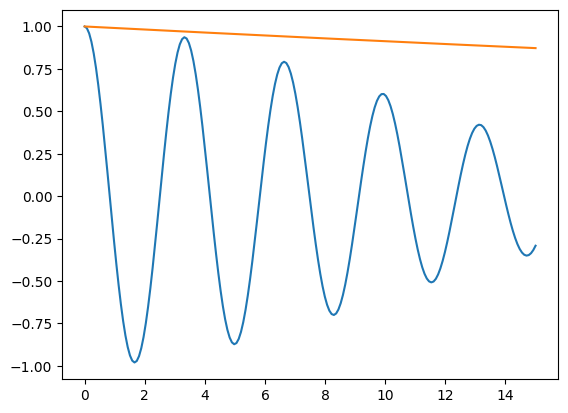

In [70]:
plt.plot(t_list, results_Jij_oscillation/2)
plt.plot(t_list, 1-(results_Jij_leakage + 1))
#plt.hlines(full_results[max_index], 0, 10, color='r')
#plt.hlines(full_results[second_max_index], 0, 10, color='r')
#plt.hlines(full_results[third_max_index], 0, 10, color='r')

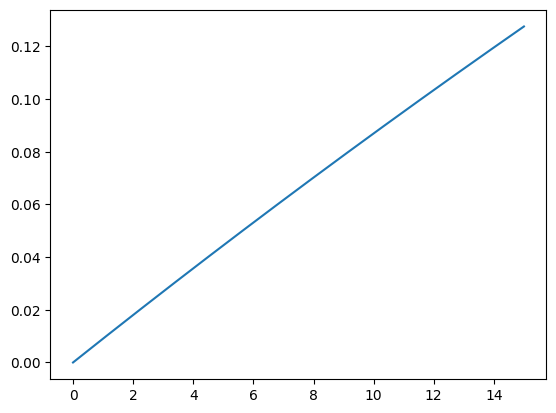

In [71]:
plt.plot(t_list, (results_Jij_leakage + 1))
